In [48]:
import pandas as pd
import numpy as np
import re

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/behe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load the dataset

In [5]:
df = pd.read_csv('data_to_be_cleansed.csv')
print(df.head())

print(df.isnull().sum())
df.dropna(inplace=True)

   Unnamed: 0                                               text  \
0           0  Welcome to /r/depression's check-in post - a p...   
1           1  We understand that most people who reply immed...   
2           2  Anyone else just miss physical touch? I crave ...   
3           3  I’m just so ashamed. Everyone and everything f...   
4           4  I really need a friend. I don't even have a si...   

                                               title  target  
0  Regular check-in post, with information about ...       1  
1  Our most-broken and least-understood rules is ...       1  
2  I haven’t been touched, or even hugged, in so ...       1  
3                    Being Depressed is Embarrassing       1  
4  I'm desperate for a friend and to feel loved b...       1  
Unnamed: 0      0
text          350
title           0
target          0
dtype: int64


In [6]:
df = df[['text', 'target']]
df

,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1
...,...,...
5952,I’ve (24M) dealt with depression/anxiety for y...,4
5953,"""I don't feel very good, it's like I don't be...",4
5954,"I can't sleep most of the nights, meds didn't ...",4
5955,"Hi, all. I have to give a presentation at work...",4


### Prepare the dataset

In [10]:
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with a space
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and trim
    return text

df['text'] = df['text'].apply(clean_text)
df['text'][0]

'welcome to rdepressions checkin post a place to take a moment and share what is going on and how you are doing if you have an accomplishment you want to talk about these shouldnt be standalone posts in the sub as they violate the role model rule but are welcome here or are having a tough time but prefer not to make your own post this is a place you can share our subreddit rules are located in the sidebar you can also always access them at since all of them exist for important safety reasons we ask everyone here to read and follow them please click report on any harmful content you see here we always want to know and deal as soon as we can we also have several wikis there for help with finding and giving support provides guidance about what is and isnt a depressive disorder guidance on the complex nature of the illnesses that are usually grouped under the depression label and redirect information for common offtopic issues offers information on the nature and value of peer support for 

In [14]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [17]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad the sequences
max_len = 512
X = pad_sequences(sequences, maxlen=max_len)

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['target'])
y

array([1, 1, 1, ..., 4, 4, 4])

In [38]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=1000))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 387ms/step - accuracy: 0.9839 - loss: 0.0599 - val_accuracy: 0.6388 - val_loss: 1.7200
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 390ms/step - accuracy: 0.9811 - loss: 0.0553 - val_accuracy: 0.5897 - val_loss: 1.8082
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.9603 - loss: 0.1171 - val_accuracy: 0.6276 - val_loss: 1.7049
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 427ms/step - accuracy: 0.9858 - loss: 0.0527 - val_accuracy: 0.6132 - val_loss: 1.7069
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 426ms/step - accuracy: 0.9739 - loss: 0.0762 - val_accuracy: 0.6321 - val_loss: 1.7096
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 400ms/step - accuracy: 0.9855 - loss: 0.0563 - val_accuracy: 0.6388 - val_loss: 1.8009
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 398ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.6288 - val_loss: 1.9046
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 398ms/step - accuracy: 0.9816 - loss: 0

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6355 - loss: 1.7742
Test Accuracy: 0.6212


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
[[138  22   8  33  16]
 [ 11 165   8  70  12]
 [ 13  37 101  24  16]
 [ 13  32   5 166   6]
 [ 24  31   9  35 127]]
              precision    recall  f1-score   support

     Class 0       0.69      0.64      0.66       217
     Class 1       0.57      0.62      0.60       266
     Class 2       0.77      0.53      0.63       191
     Class 3       0.51      0.75      0.60       222
     Class 4       0.72      0.56      0.63       226

    accuracy                           0.62      1122
   macro avg       0.65      0.62      0.62      1122
weighted avg       0.65      0.62      0.62      1122



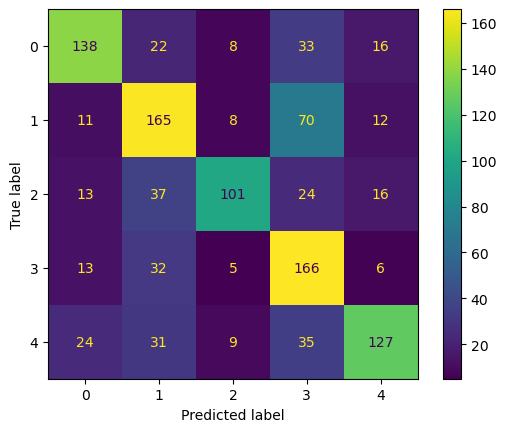

In [50]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=[0, 1, 2, 3, 4])
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.savefig('conf_mat2.png')

class_report = classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in range(5)], output_dict=True)
print(class_report)

/Users/behe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


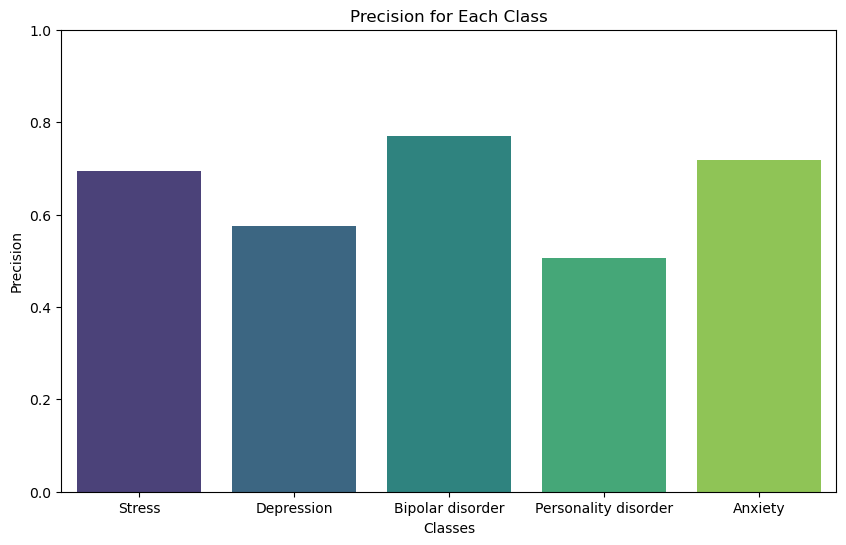

In [52]:
precision_values = [class_report[f'Class {i}']['precision'] for i in range(5)]
classes = ['Stress', 'Depression', 'Bipolar disorder', 'Personality disorder', 'Anxiety']

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=precision_values, palette='viridis')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.ylim(0, 1)
plt.show()